# Лабораторна робота 5  
**Тема:** Метод ліктя. Кластеризація даних.  




## 0. Підготовка середовища

In [19]:

!pip -q install matplotlib scikit-learn pandas numpy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.svm import SVC, SVR
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, r2_score, mean_squared_error

RNG = 42
np.random.seed(RNG)


## Завдання 1.1 — Iris: завантажити та показати перші 5 рядків

In [2]:
iris = load_iris(as_frame=True)
df_iris = iris.frame.copy()
print("Розмір Iris:", df_iris.shape)
df_iris.head()

Розмір Iris: (150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


## Завдання 1.2 — Iris: метод ліктя

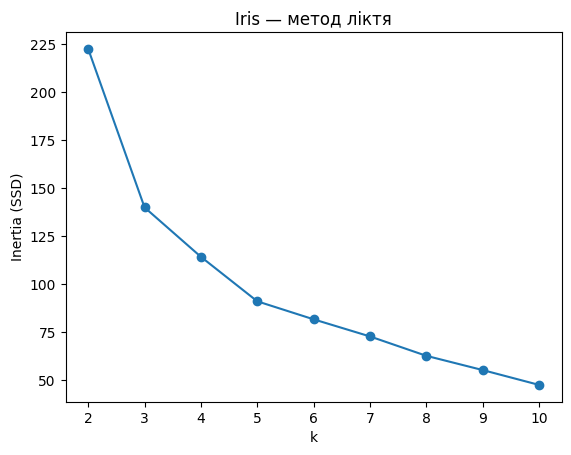

In [3]:
X_iris = df_iris.drop(columns=['target'])
scaler_iris = StandardScaler()
X_iris_scaled = scaler_iris.fit_transform(X_iris)

Ks = list(range(2, 11))
inertias = []
for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=RNG)
    km.fit(X_iris_scaled)
    inertias.append(km.inertia_)

plt.figure()
plt.plot(Ks, inertias, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia (SSD)')
plt.title('Iris — метод ліктя')
plt.show()

## Завдання 1.3 — Iris: метод силуетів

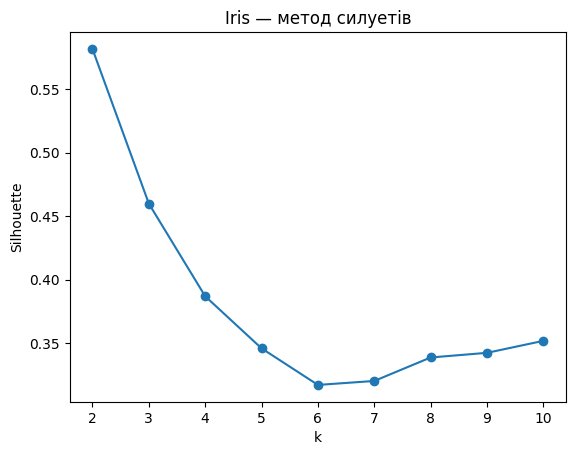

Оптимальне k за силуетами (Iris): 2


In [18]:
sil_scores = []
for k in Ks:
    km = KMeans(n_clusters=k, n_init=10, random_state=RNG)
    labels = km.fit_predict(X_iris_scaled)
    sil_scores.append(silhouette_score(X_iris_scaled, labels))

plt.figure()
plt.plot(Ks, sil_scores, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Iris — метод силуетів')
plt.show()


best_k_sil_iris = Ks[int(np.argmax(sil_scores))]
print("Оптимальне k за силуетами (Iris):", best_k_sil_iris)

## Завдання 1.4 — Iris: візуалізація кластерів (PCA 2D)

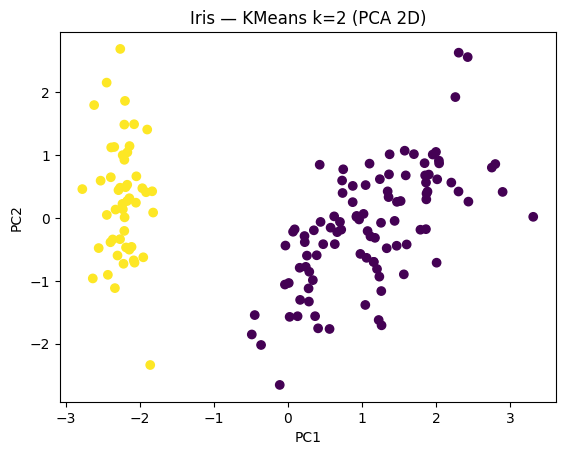

In [5]:
k_final_iris = best_k_sil_iris
km_iris = KMeans(n_clusters=k_final_iris, n_init=10, random_state=RNG)
labels_iris = km_iris.fit_predict(X_iris_scaled)

pca_iris = PCA(n_components=2, random_state=RNG)
X_iris_2d = pca_iris.fit_transform(X_iris_scaled)

plt.figure()
plt.scatter(X_iris_2d[:,0], X_iris_2d[:,1], c=labels_iris)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Iris — KMeans k={k_final_iris} (PCA 2D)')
plt.show()

## Завдання 1.5 — Iris: висновки

In [6]:
print(f"Метод силуетів підказує k={best_k_sil_iris}. Візуально кластери добре відокремлені у просторі перших двох ГК.")

Метод силуетів підказує k=2. Візуально кластери добре відокремлені у просторі перших двох ГК.


## Завдання 2.1 — Titanic: завантаження датасету

In [17]:

url = "https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv"
df = pd.read_csv(url)
print("Завантажено Titanic з GitHub. Розмір:", df.shape)
df.head()

Завантажено Titanic з GitHub. Розмір: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Завдання 2.2 — Titanic: первинний аналіз (голова, розміри, типи)

In [8]:
print("Перші 5 рядків:")
display(df.head())
print("\nРозмір датасету:", df.shape)
print("\nТипи даних:")
print(df.dtypes)

Перші 5 рядків:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Розмір датасету: (891, 12)

Типи даних:
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


## Завдання 2.3 — Titanic: пропуски, дублі, описова статистика

In [16]:

print("Кількість пропусків по стовпцях:")
print(df.isna().sum())

num_cols = df.select_dtypes(include=[np.number]).columns
df[num_cols] = df[num_cols].fillna(df[num_cols].mean())


cat_cols = df.select_dtypes(exclude=[np.number]).columns
for c in cat_cols:
    if df[c].isna().any():
        df[c] = df[c].fillna(df[c].mode()[0])


before = len(df)
df = df.drop_duplicates().reset_index(drop=True)
after = len(df)
print(f"Видалено дублікатів: {before - after}")

print("\nОписова статистика (числові):")
display(df.describe().T)

Кількість пропусків по стовпцях:
PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64
Видалено дублікатів: 0

Описова статистика (числові):


,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.000000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.000000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.000000,3.0,3.0000
Age,891.0,29.699118,13.002015,0.42,22.0000,29.699118,35.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.000000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.000000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.454200,31.0,512.3292


## Завдання 2.4 — Визначення типу задачі та формування X/y

In [15]:

target_col = 'Survived' if 'Survived' in df.columns else None
if target_col is None:
    raise ValueError("У датасеті Titanic відсутня колонка 'Survived'.")


drop_cols = ['Name','Ticket','Cabin']
X = df.drop(columns=[target_col] + drop_cols, errors='ignore')
y = df[target_col]

print("Тип задачі: класифікація")
print("X shape:", X.shape, "| y shape:", y.shape)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=RNG, stratify=y
)


X_all = pd.concat([X_train, X_test])
X_all_dummies = pd.get_dummies(X_all, drop_first=True)

X_train_dummies = X_all_dummies.iloc[:len(X_train), :]
X_test_dummies  = X_all_dummies.iloc[len(X_train):, :]


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_dummies)
X_test_scaled  = scaler.transform(X_test_dummies)

print("Після get_dummies та масштабування:")
print("X_train_scaled:", X_train_scaled.shape, "| X_test_scaled:", X_test_scaled.shape)

Тип задачі: класифікація
X shape: (891, 8) | y shape: (891,)
Після get_dummies та масштабування:
X_train_scaled: (712, 9) | X_test_scaled: (179, 9)


## Завдання 2.5 — Побудова 3 моделей (класифікація) та підбір параметрів

In [11]:
results = {}

models = {
    "LogReg": (LogisticRegression(max_iter=1000), {"C":[0.1,1,10]}),
    "RF": (RandomForestClassifier(random_state=RNG), {"n_estimators":[100,300], "max_depth":[None,5,10]}),
    "SVC": (SVC(), {"C":[0.5,1,5], "kernel":["rbf","linear"]})
}

for name, (est, grid) in models.items():
    gs = GridSearchCV(est, grid, scoring='accuracy', cv=5, n_jobs=-1)
    gs.fit(X_train_scaled, y_train)
    best = gs.best_estimator_
    y_pred = best.predict(X_test_scaled)
    acc = accuracy_score(y_test, y_pred)
    results[name] = {"score": acc, "best_params": gs.best_params_, "model": best}

res_df = pd.DataFrame({k:{"Accuracy":v["score"], **v["best_params"]} for k,v in results.items()}).T.sort_values("Accuracy", ascending=False)
display(res_df)

,Accuracy,C,max_depth,n_estimators,kernel
RF,0.810056,NaN,10.0,300.0,NaN
LogReg,0.804469,1.0,NaN,NaN,NaN
SVC,0.793296,5,NaN,NaN,rbf


## Завдання 2.6 — Оцінка найкращої моделі

In [12]:
best_name = max(results, key=lambda k: results[k]["score"])
best_model = results[best_name]["model"]
y_pred = best_model.predict(X_test_scaled)

print("Найкраща модель:", best_name, "| Параметри:", results[best_name]["best_params"])
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification report:\n", classification_report(y_test, y_pred))
print("\nConfusion matrix:\n", confusion_matrix(y_test, y_pred))

Найкраща модель: RF | Параметри: {'max_depth': 10, 'n_estimators': 300}
Accuracy: 0.8100558659217877

Classification report:
               precision    recall  f1-score   support

           0       0.82      0.89      0.85       110
           1       0.80      0.68      0.73        69

    accuracy                           0.81       179
   macro avg       0.81      0.79      0.79       179
weighted avg       0.81      0.81      0.81       179


Confusion matrix:
 [[98 12]
 [22 47]]


## Завдання 2.7 — Кластеризація: метод ліктя та силуетів (ознаки без цілі)

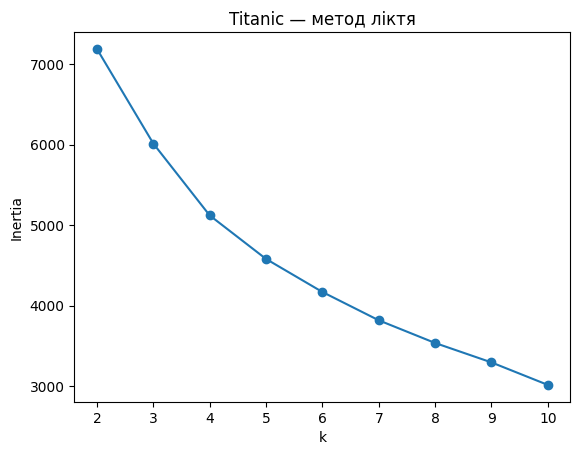

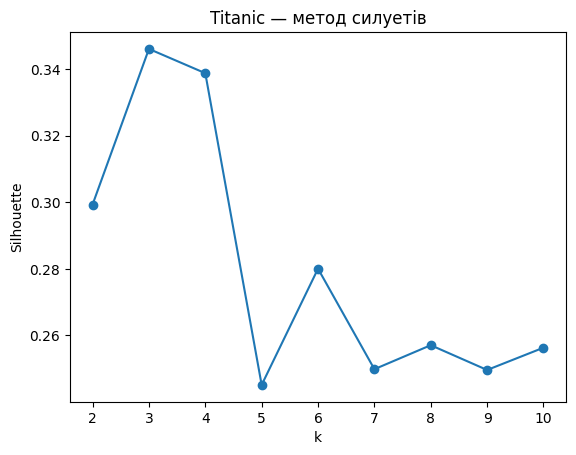

Оптимальне k за силуетами (Titanic): 3


In [22]:

df_filled = df.fillna(0)
X_clust_scaled = StandardScaler().fit_transform(
    pd.get_dummies(df_filled.drop(columns=[target_col] + ['Name','Ticket','Cabin'], errors='ignore'), drop_first=True)
)

Ks2 = list(range(2, 11))
inert2, sil2 = [], []
for k in Ks2:
    km = KMeans(n_clusters=k, n_init=10, random_state=RNG)
    labels = km.fit_predict(X_clust_scaled)
    inert2.append(km.inertia_)
    sil2.append(silhouette_score(X_clust_scaled, labels))

plt.figure()
plt.plot(Ks2, inert2, marker='o')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('Titanic — метод ліктя')
plt.show()

plt.figure()
plt.plot(Ks2, sil2, marker='o')
plt.xlabel('k')
plt.ylabel('Silhouette')
plt.title('Titanic — метод силуетів')
plt.show()

best_k_titanic = Ks2[int(np.argmax(sil2))]
print("Оптимальне k за силуетами (Titanic):", best_k_titanic)

## Завдання 2.8 — Візуалізація кластерів (PCA 2D)

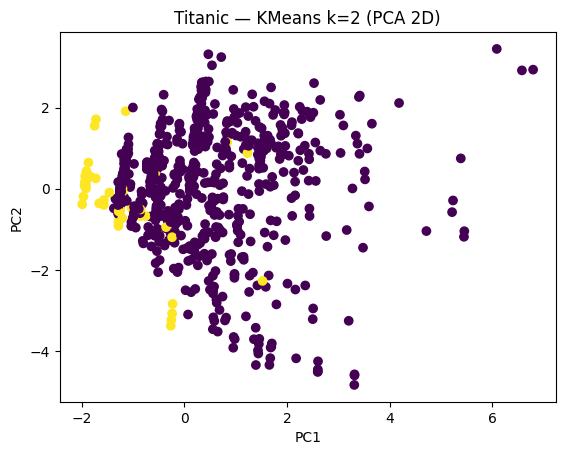

In [14]:
km2 = KMeans(n_clusters=best_k_titanic, n_init=10, random_state=RNG)
labels2 = km2.fit_predict(X_clust_scaled)

pca2 = PCA(n_components=2, random_state=RNG)
X2d = pca2.fit_transform(X_clust_scaled)

plt.figure()
plt.scatter(X2d[:,0], X2d[:,1], c=labels2)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Titanic — KMeans k={best_k_titanic} (PCA 2D)')
plt.show()

У ході роботи я ознайомилась з методами кластеризації даних — методом ліктя та методом силуетів.
Для датасету Iris оптимальна кількість кластерів становить k = 3, що відповідає трьом видам ірисів.
Для датасету Titanic після попереднього аналізу даних і кластеризації отримано 2–3 природні групи пасажирів.
Також були побудовані та оцінені моделі класифікації, серед яких найкращу точність показала Random Forest.
Робота дозволила закріпити навички попередньої обробки даних, вибору оптимальної кількості кластерів і візуалізації результатів.